## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from pylamp.neural.layers import Linear
from pylamp.optim.optimizer import Optim
from pylamp.optim.optimizer import SGD
from pylamp.loss.losses import MSELoss, BCELoss
from pylamp.utils.data import DataGenerator as dg 

## Training on Regression task

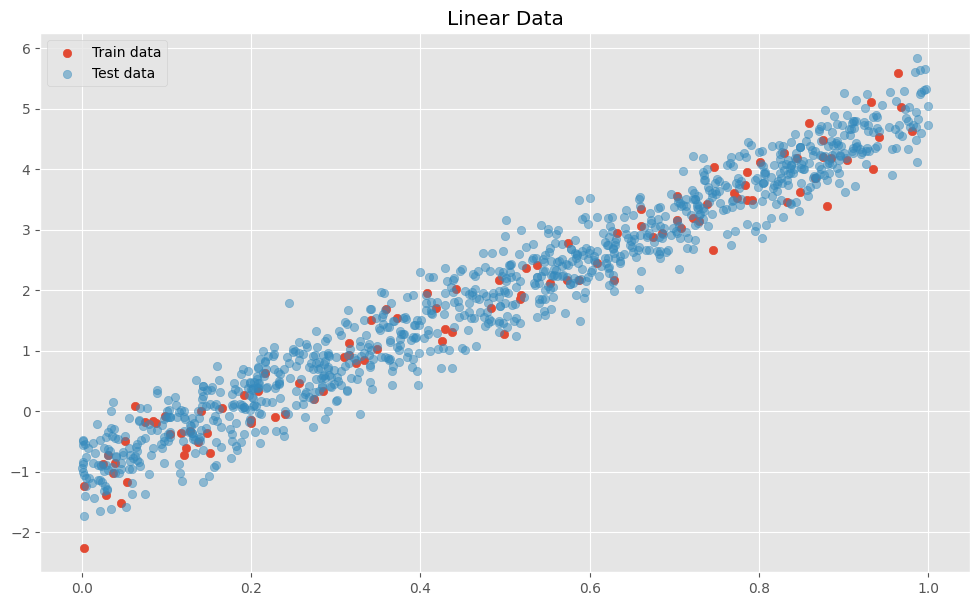

In [3]:
X_train, X_test,y_train,y_test  = dg.generate_linear_data()
dg.plot_linear_data(X_train, y_train, X_test, y_test, title='Linear Data', alpha_train=1, alpha_test=0.5)

**Model, loss and optimizer**

In [4]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
print(f'input_size: {input_size}, output_size: {output_size}')
model = Linear(input_size, output_size, use_bias=True)
loss = MSELoss()

optimizer_linear = Optim(model,loss,1e-2)

model_linear_losses = SGD(optimizer_linear,X_train, y_train, batch_size=10,epochs=300,verbose=True)


input_size: 1, output_size: 1
Epoch 1/300, Average Loss: 5.282426299384757
Epoch 31/300, Average Loss: 1.1062232692660374
Epoch 61/300, Average Loss: 0.53165313039469
Epoch 91/300, Average Loss: 0.29714919607840795
Epoch 121/300, Average Loss: 0.2011102105910921
Epoch 151/300, Average Loss: 0.1619651397639605
Epoch 181/300, Average Loss: 0.14587022586879406
Epoch 211/300, Average Loss: 0.13949444858750787
Epoch 241/300, Average Loss: 0.13690400119310644
Epoch 271/300, Average Loss: 0.135630994079104
Training finished.


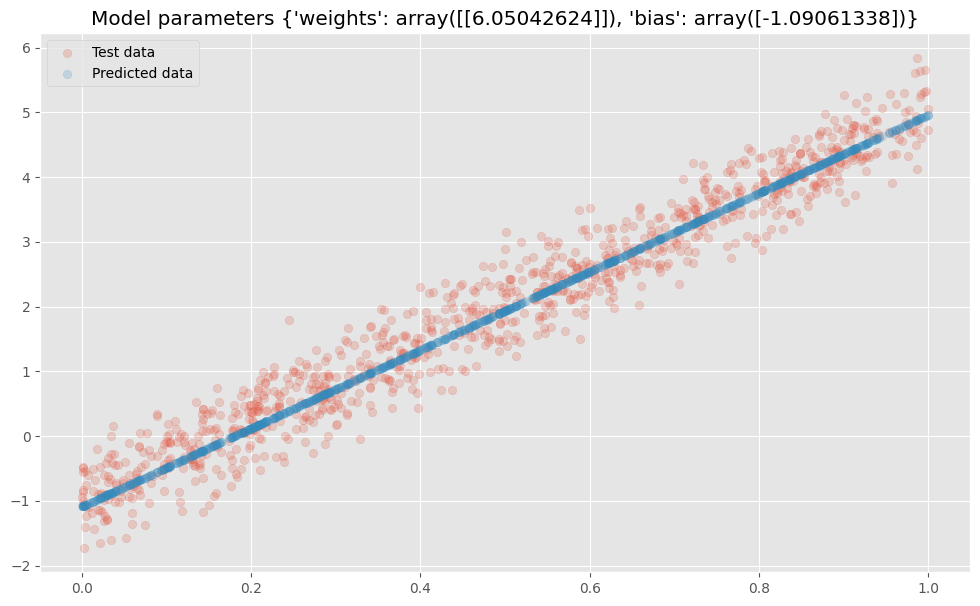

In [5]:
output = model.forward(X_test.reshape(-1,1))
title = f"Model parameters {model._parameters}"
dg.plot_linear_data(X_test, y_test, X_test, output, title_train="Test data",title_test="Predicted data", title=title)

## Training on Classification Task

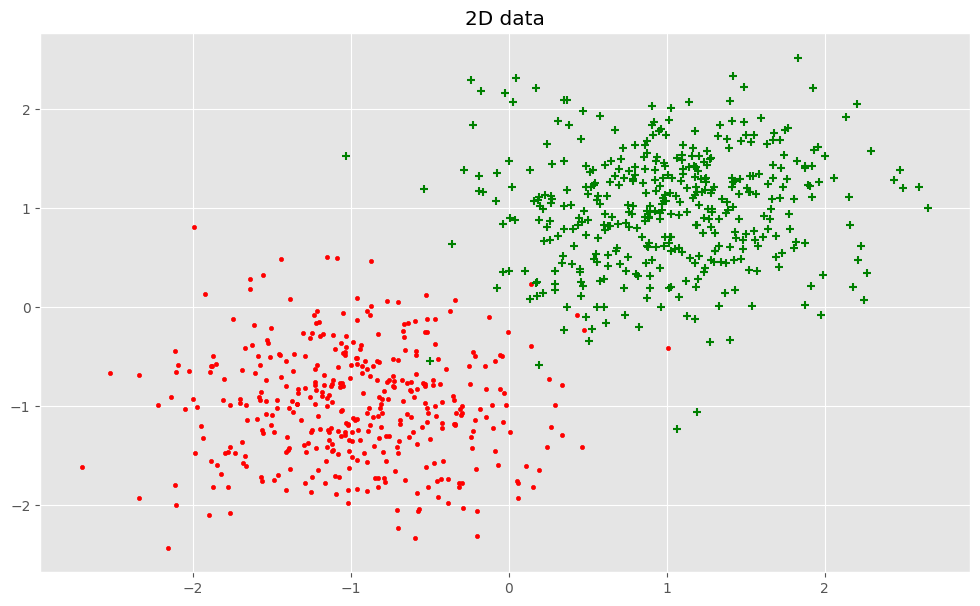

In [6]:
X_train, X_test, y_train, y_test  = dg.generate_2D_data(data_type=0, epsilon=0.5)
dg.plot_2D_data(X_train, y_train)

**Model, loss and optimizer**

In [7]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
print(f'input_size: {input_size}, output_size: {output_size}')
model = Linear(input_size, output_size, use_bias=True)
loss = BCELoss()

optimizer_linear = Optim(model,loss,1e-3)

model_linear_losses = SGD(optimizer_linear,X_train, y_train, batch_size=10,epochs=100,verbose=True)


input_size: 2, output_size: 1
Epoch 1/100, Average Loss: 0.4029639580459786
Epoch 11/100, Average Loss: 0.345387763949107
Epoch 21/100, Average Loss: 0.43173470493638366
Epoch 31/100, Average Loss: 0.345387763949107
Epoch 41/100, Average Loss: 0.37417007761153254
Epoch 51/100, Average Loss: 0.23025850929940464
Epoch 61/100, Average Loss: 0.46051701859880917
Epoch 71/100, Average Loss: 0.31660545028668136
Epoch 81/100, Average Loss: 0.31660545028668136
Epoch 91/100, Average Loss: 0.17269388197455346
Training finished.


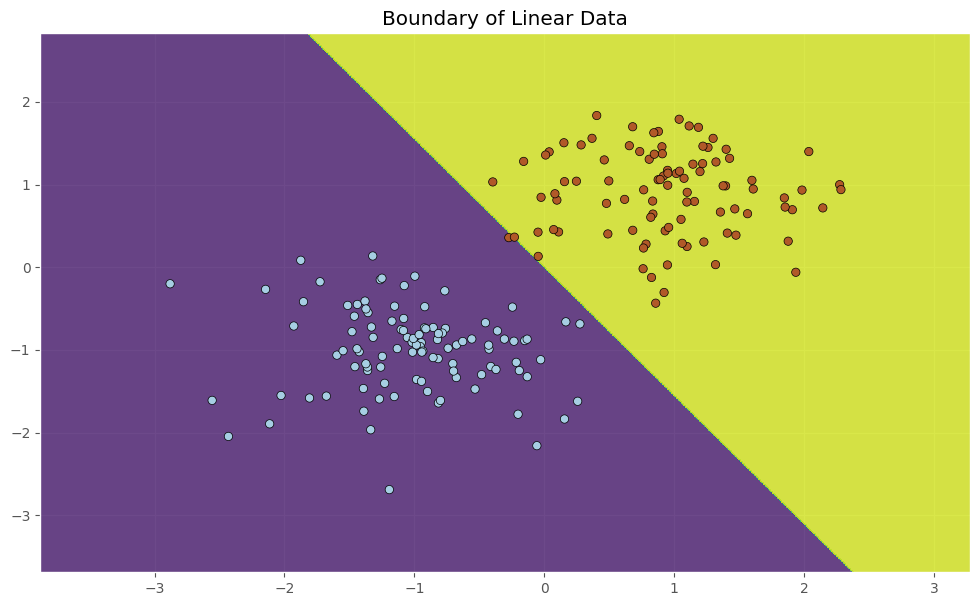

In [8]:
dg.plot_decision_boundary(X_test, y_test, model, "Boundary of Linear Data")